# EDA using polars

**Import data from Kaggle**

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"phuongkhanh21","key":"0fd6eb70e1509aad441adeb76f0dfff2"}'}

In [2]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d berkanoztas/synthetic-transaction-monitoring-dataset-aml

import zipfile

with zipfile.ZipFile("synthetic-transaction-monitoring-dataset-aml.zip", 'r') as zip_ref:
    zip_ref.extractall("synthetic_transaction_data")

Dataset URL: https://www.kaggle.com/datasets/berkanoztas/synthetic-transaction-monitoring-dataset-aml
License(s): CC-BY-NC-SA-4.0
synthetic-transaction-monitoring-dataset-aml.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import pandas as pd
import polars as pl
from datetime import timedelta

In [4]:

os.listdir("synthetic_transaction_data")
df = pl.read_csv("synthetic_transaction_data/SAML-D.csv")
df.head(5)

Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
str,str,i64,i64,f64,str,str,str,str,str,i64,str
"""10:35:19""","""2022-10-07""",8724731955,2769355426,1459.15,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cash Deposit""",0,"""Normal_Cash_Deposits"""
"""10:35:20""","""2022-10-07""",1491989064,8401255335,6019.64,"""UK pounds""","""Dirham""","""UK""","""UAE""","""Cross-border""",0,"""Normal_Fan_Out"""
"""10:35:20""","""2022-10-07""",287305149,4404767002,14328.44,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cheque""",0,"""Normal_Small_Fan_Out"""
"""10:35:21""","""2022-10-07""",5376652437,9600420220,11895.0,"""UK pounds""","""UK pounds""","""UK""","""UK""","""ACH""",0,"""Normal_Fan_In"""
"""10:35:21""","""2022-10-07""",9614186178,3803336972,115.25,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cash Deposit""",0,"""Normal_Cash_Deposits"""


**Conver "Date" and "Time" to datetime**

In [5]:
df = df.with_columns(
    pl.col("Date").str.strptime(pl.Date, "%Y-%m-%d").alias("Date"),
    pl.col("Time").str.strptime(pl.Time, "%H:%M:%S").alias("Time")
)
df.head()

Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
time,date,i64,i64,f64,str,str,str,str,str,i64,str
10:35:19,2022-10-07,8724731955,2769355426,1459.15,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cash Deposit""",0,"""Normal_Cash_Deposits"""
10:35:20,2022-10-07,1491989064,8401255335,6019.64,"""UK pounds""","""Dirham""","""UK""","""UAE""","""Cross-border""",0,"""Normal_Fan_Out"""
10:35:20,2022-10-07,287305149,4404767002,14328.44,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cheque""",0,"""Normal_Small_Fan_Out"""
10:35:21,2022-10-07,5376652437,9600420220,11895.0,"""UK pounds""","""UK pounds""","""UK""","""UK""","""ACH""",0,"""Normal_Fan_In"""
10:35:21,2022-10-07,9614186178,3803336972,115.25,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cash Deposit""",0,"""Normal_Cash_Deposits"""


In [6]:
# dropping column Laundering_type
df = df.drop("Laundering_type")

In [7]:
def custom_split_polars(df: pl.DataFrame, validation_dt: int = 70, test_dt: int = 35):
    """
    Split a Polars DataFrame into train/validation/test by calendar-day cutoffs
    measured backwards from the dataset max Date.

    Parameters
    - df: polars.DataFrame with a datetime column named "Date" (string or datetime OK)
    - validation_dt: int days for validation window (e.g., 70)
    - test_dt: int days for test window (e.g., 35)

    Returns
    - train_df, validation_df, test_df  (all eager polars.DataFrame)
    """
    # ensure Date is a datetime type: try to get max, otherwise parse strings to Datetime
    try:
        max_date = df.select(pl.col("Date").max()).to_series()[0]
    except Exception:
        df = df.with_column(pl.col("Date").str.strptime(pl.Datetime, fmt=None).alias("Date"))
        max_date = df.select(pl.col("Date").max()).to_series()[0]

    test_cutoff = max_date - timedelta(days=test_dt)
    validation_cutoff = max_date - timedelta(days=validation_dt)

    test_set = df.filter(pl.col("Date") >= pl.lit(test_cutoff))
    validation_set = df.filter(
        (pl.col("Date") >= pl.lit(validation_cutoff)) & (pl.col("Date") < pl.lit(test_cutoff))
    )
    train_set = df.filter(pl.col("Date") < pl.lit(validation_cutoff))

    return train_set, validation_set, test_set

In [8]:
df_train, df_val, df_test = custom_split_polars(df)

In [9]:
df_train.head()

Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering
time,date,i64,i64,f64,str,str,str,str,str,i64
10:35:19,2022-10-07,8724731955,2769355426,1459.15,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cash Deposit""",0
10:35:20,2022-10-07,1491989064,8401255335,6019.64,"""UK pounds""","""Dirham""","""UK""","""UAE""","""Cross-border""",0
10:35:20,2022-10-07,287305149,4404767002,14328.44,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cheque""",0
10:35:21,2022-10-07,5376652437,9600420220,11895.0,"""UK pounds""","""UK pounds""","""UK""","""UK""","""ACH""",0
10:35:21,2022-10-07,9614186178,3803336972,115.25,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cash Deposit""",0


**Recast**

In [10]:
'''
We recast the integer‑based columns following the logic rules outlined in the paper.
"Explainable Feature Engineering for Multi-class Money Laundering Classification"
This recasting is performed to optimize storage efficiency and reduce overall memory consumption."
Excluding "Sender_account" and "Receiver_account" variables.
'''

def recast(df):
    exclude = ['Sender_account', 'Receiver_account']

    for col in df.columns:
        if col not in exclude:
            dtype = df[col].dtype
            if dtype in (pl.Int64, pl.Int32):
              maxval = df[col].max()
              if maxval:
                  if maxval < 127:
                      df = df.with_columns(df[col].cast(pl.Int8).alias(col))
                  elif maxval < 32767:
                      df = df.with_columns(df[col].cast(pl.Int16).alias(col))
                  elif maxval < 2147483647:
                      df = df.with_columns(df[col].cast(pl.Int32).alias(col))

    return df

In [11]:
df_train = recast(df_train)

In [12]:
df_train.head()

Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering
time,date,i64,i64,f64,str,str,str,str,str,i8
10:35:19,2022-10-07,8724731955,2769355426,1459.15,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cash Deposit""",0
10:35:20,2022-10-07,1491989064,8401255335,6019.64,"""UK pounds""","""Dirham""","""UK""","""UAE""","""Cross-border""",0
10:35:20,2022-10-07,287305149,4404767002,14328.44,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cheque""",0
10:35:21,2022-10-07,5376652437,9600420220,11895.0,"""UK pounds""","""UK pounds""","""UK""","""UK""","""ACH""",0
10:35:21,2022-10-07,9614186178,3803336972,115.25,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cash Deposit""",0


**Temporal features**

In [13]:
def temporal_features(df):

    return df.with_columns([
        df["Date"].dt.year().alias("year"),
        df["Date"].dt.month().alias("month"),
        df["Date"].dt.day().alias("day_of_month"),
        df["Date"].dt.weekday().alias("day_of_week"),
        df["Date"].dt.ordinal_day().alias("day_of_year"),
        df["Time"].dt.hour().alias("hour"),
        df["Time"].dt.minute().alias("minute"),
        df["Time"].dt.second().alias("second"),
    ])

In [14]:
df_train = temporal_features(df_train)

**Transaction Risk Features**

In [15]:
high_risk_countries = ['Mexico', 'Turkey', 'Morocco', 'UAE']

In [16]:
def risk_features(df):

    return df.with_columns([
        (df["Payment_currency"] != df["Received_currency"]).cast(pl.Int8).alias("currency_mismatch"),
        (df["Payment_type"] == "Cross-border").cast(pl.Int8).alias("cross_border"),
        df["Sender_bank_location"].is_in(high_risk_countries).cast(pl.Int8).alias("high_risk_sender"),
        df["Receiver_bank_location"].is_in(high_risk_countries).cast(pl.Int8).alias("high_risk_receiver")])

In [17]:
df_train = risk_features(df_train)

**build_window_features_lazy**

- Function name: build_window_features_lazy
- One-line purpose: Computes 30‑day rolling window features (for example, fanin_30d, fanout_30d) on a LazyFrame in a calendar-aligned, memory-efficient way.

In [18]:
import polars as pl

def build_window_features_lazy(
    df,
    specs,
    date_col="Date",
    sender_col="Sender_account",
    receiver_col="Receiver_account",
    amount_col="Amount",
    index_name="__row_idx",
    label_choice="left",
):
    lf = df.lazy() if isinstance(df, pl.DataFrame) else df
    lf = lf.with_columns(pl.arange(0, pl.len()).over(pl.lit(True)).alias(index_name))
    out_lf = lf

    for spec in specs:
        kind = spec.get("kind", "rolling")

        if kind == "rolling":
            # existing rolling logic (no change)
            name = spec["name"]
            direction = spec["type"]  # "fanin" or "fanout"
            period_days = int(spec["period_days"])
            every = spec.get("every", "1d")

            if direction == "fanin":
                group_by = receiver_col
                agg_on = sender_col
            else:
                group_by = sender_col
                agg_on = receiver_col

            win_label = label_choice
            strategy = "forward" if win_label == "left" else "backward"

            right = (
                lf
                .sort([group_by, date_col])
                .group_by_dynamic(
                    index_column=date_col,
                    every=every,
                    period=f"{period_days}d",
                    group_by=group_by,
                    closed="both",
                    label=win_label
                )
                .agg(pl.col(agg_on).n_unique().alias(name))
                .sort([group_by, date_col])
            )

            left = out_lf.sort([group_by, date_col])

            out_lf = left.join_asof(
                right,
                left_on=date_col,
                right_on=date_col,
                by=group_by,
                strategy=strategy,
            )

        elif kind == "monthly":
            # existing monthly logic (no change)
            name = spec["name"]
            side = spec.get("side", "receive")
            group_col = receiver_col if side == "receive" else sender_col

            monthly_agg = (
                lf
                .with_columns(pl.col(date_col).dt.truncate("1mo").alias("__month"))
                .group_by([group_col, "__month"])
                .agg(pl.col(amount_col).sum().alias(name))
            )

            out_lf = (
                out_lf
                .with_columns(pl.col(date_col).dt.truncate("1mo").alias("__month"))
                .join(monthly_agg, on=[group_col, "__month"], how="left")
                .drop("__month")
            )

        elif kind == "daily_pair_count":
            # NEW: back_and_forth_transfers (exact-match on day + pair)
            name = spec["name"]  # e.g., "back_and_forth_transfers"
            # day key = calendar day (truncate to 1 day)
            day_key = "__day"
            # compute counts per sender/receiver/day using lf (lazy)
            pair_daily_agg = (
                lf
                .with_columns(pl.col(date_col).dt.truncate("1d").alias(day_key))
                .group_by([sender_col, receiver_col, day_key])
                .agg(pl.len().alias(name))  # .len() counts rows in group
            )

            # attach day key to working frame and join exact on pair + day
            out_lf = (
                out_lf
                .with_columns(pl.col(date_col).dt.truncate("1d").alias(day_key))
                .join(pair_daily_agg, on=[sender_col, receiver_col, day_key], how="left")
                .fill_null(0)       # optional: replace nulls with 0
                .with_columns(pl.col(name).cast(pl.Int64))  # ensure integer type
                .drop(day_key)
            )

        else:
            raise ValueError("spec kind must be 'rolling', 'monthly', or 'daily_pair_count'")

    return out_lf

In [19]:
specs = [
    {"name":"fanin_30d", "kind":"rolling", "type":"fanin", "period_days":30, "every":"1d"},
    {"name":"fanout_30d", "kind":"rolling", "type":"fanout", "period_days":30, "every":"1d"},
    {"name":"daily_recieve", "kind":"rolling", "type":"fanin", "period_days":1, "every":"1d"},
    {"name":"monthly_receive", "kind":"monthly", "side":"receive"},
    {"name":"monthly_send",    "kind":"monthly", "side":"send"},
    {"name":"back_and_forth_transfers", "kind":"daily_pair_count"},
]
lazy_with_features = build_window_features_lazy(df_train, specs, amount_col="Amount", label_choice="left")


In [20]:
plan = (
    lazy_with_features
    .sort(["Sender_account", "Date"])
    .with_columns([pl.col("Sender_account").set_sorted(), pl.col("Date").set_sorted()])
)
df_streamed = plan.collect(engine="streaming")
df_train = df_streamed.sort("__row_idx").drop("__row_idx")

/tmp/ipython-input-2168608404.py:6: UserWarning: Sortedness of columns cannot be checked when 'by' groups provided
  df_streamed = plan.collect(engine="streaming")


In [21]:
df_train.head()

Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,year,month,day_of_month,day_of_week,day_of_year,hour,minute,second,currency_mismatch,cross_border,high_risk_sender,high_risk_receiver,fanin_30d,fanout_30d,daily_recieve,monthly_receive,monthly_send,back_and_forth_transfers
time,date,i64,i64,f64,str,str,str,str,str,i8,i32,i8,i8,i8,i16,i8,i8,i8,i8,i8,i8,i8,u32,u32,u32,f64,f64,i64
10:35:19,2022-10-07,8724731955,2769355426,1459.15,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cash Deposit""",0,2022,10,7,5,280,10,35,19,0,0,0,0,2,1,1,1459.15,1459.15,1
10:35:20,2022-10-07,1491989064,8401255335,6019.64,"""UK pounds""","""Dirham""","""UK""","""UAE""","""Cross-border""",0,2022,10,7,5,280,10,35,20,1,1,0,1,1,29,1,72252.38,1.0918e6,12
10:35:20,2022-10-07,287305149,4404767002,14328.44,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cheque""",0,2022,10,7,5,280,10,35,20,0,0,0,0,1,12,1,14328.44,181662.45,1
10:35:21,2022-10-07,5376652437,9600420220,11895.0,"""UK pounds""","""UK pounds""","""UK""","""UK""","""ACH""",0,2022,10,7,5,280,10,35,21,0,0,0,0,11,1,9,885090.99,107439.96,9
10:35:21,2022-10-07,9614186178,3803336972,115.25,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cash Deposit""",0,2022,10,7,5,280,10,35,21,0,0,0,0,3,1,1,5010.29,3342.19,1


**compute_derived_features_lazy**

- Function name: compute_derived_features_lazy
- One-line purpose: Compute derived features on a Polars LazyFrame by combining existing windowed features (for example, use fanin_30d and fanout_30d to produce ratio and normalized features) while preserving laziness and dtype consistency.

In [22]:
from typing import List, Dict

def compute_derived_features_lazy(
    lf: pl.LazyFrame,
    *,
    fanin_col: str = "fanin_30d",
    fanout_col: str = "fanout_30d",
    daily_receive_col: str = "daily_receive",
    monthly_receive_col: str = "monthly_receive",
    monthly_send_col: str = "monthly_send",
    amount_col: str = "Amount",
    sender_col: str = "Sender_account",
    receiver_col: str = "Receiver_account",
    index_name: str = "__row_idx",
) -> pl.LazyFrame:
    """
    Take a LazyFrame and return a LazyFrame with derived features:
      - fan_in_out_ratio (safe division, 0 when denom missing or zero)
      - fanin_intensity_ratio (fanin_30d / daily_receive, 0 when denom missing or zero)
      - amount_dispersion_std (per-sender std of Amount, filled 0 when null)
      - sent_to_received_ratio_monthly (monthly_receive / monthly_send, 0 when denom missing or zero)

    If `daily_receive` is not present in lf.schema(), it is computed lazily as the
    per-receiver unique-senders per calendar day (dt.truncate("1d")) and joined back.
    The function is fully lazy; call .collect(...) when ready.
    """
    # ensure lazy input
    lf = lf if isinstance(lf, pl.LazyFrame) else lf.lazy()

    # Attempt to read schema; if unavailable assume missing and compute
    try:
        schema = lf.schema()
        has_daily = daily_receive_col in schema
    except Exception:
        has_daily = False

    # If daily_receive missing, compute it lazily (exact day bucket of unique senders per receiver)
    if not has_daily:
        day_key = "__day_for_daily_receive"
        daily_receive_agg = (
            lf
            .with_columns(pl.col("Date").dt.truncate("1d").alias(day_key))
            .group_by([receiver_col, day_key])
            .agg(pl.col(sender_col).n_unique().alias(daily_receive_col))
        )
        lf = (
            lf
            .with_columns(pl.col("Date").dt.truncate("1d").alias(day_key))
            .join(daily_receive_agg, on=[receiver_col, day_key], how="left")
            .drop(day_key)
        )

    # safe division helper expression
    def safe_div_expr(num: str, den: str, out_name: str):
        return (
            pl.when(pl.col(den).is_null() | (pl.col(den) == 0))
              .then(0.0)
              .otherwise(pl.col(num).cast(pl.Float64) / pl.col(den).cast(pl.Float64))
              .alias(out_name)
        )

    fan_in_out_expr = safe_div_expr(fanin_col, fanout_col, "fan_in_out_ratio")
    fanin_intensity_expr = safe_div_expr(fanin_col, daily_receive_col, "fanin_intensity_ratio")
    sent_to_received_monthly_expr = safe_div_expr(monthly_receive_col, monthly_send_col, "sent_to_received_ratio_monthly")

    # per-sender std aggregation (lazy) and join back
    sender_std_agg = (
        lf
        .select([sender_col, amount_col])
        .group_by(sender_col)
        .agg(pl.col(amount_col).std().alias("__amount_std"))
    )

    out = (
        lf
        .join(sender_std_agg, on=sender_col, how="left")
        .with_columns(
            pl.col("__amount_std").cast(pl.Float64).fill_null(0.0).alias("amount_dispersion_std")
        )
        .drop("__amount_std")
        .with_columns([
            fan_in_out_expr,
            fanin_intensity_expr,
            sent_to_received_monthly_expr
        ])
    )

    return out

In [23]:
lazy_with_derived = compute_derived_features_lazy(lazy_with_features)

# Before streaming collect: pick a primary grouping ordering that matches your rolling computations.
# If most rolling features used Receiver_account then Date, use that; otherwise use the grouping you chose.
plan_derived = (
    lazy_with_derived
    .sort(["Sender_account", "Date"])
    .with_columns([pl.col("Sender_account").set_sorted(), pl.col("Date").set_sorted()])
)

df_streamed = plan_derived.collect(engine="streaming")
df_train = df_streamed.sort("__row_idx").drop("__row_idx")

/tmp/ipython-input-1341853613.py:32: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  schema = lf.schema()
/tmp/ipython-input-1873375239.py:11: UserWarning: Sortedness of columns cannot be checked when 'by' groups provided
  df_streamed = plan_derived.collect(engine="streaming")


In [24]:
df_train.head()

Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,year,month,day_of_month,day_of_week,day_of_year,hour,minute,second,currency_mismatch,cross_border,high_risk_sender,high_risk_receiver,fanin_30d,fanout_30d,daily_recieve,monthly_receive,monthly_send,back_and_forth_transfers,daily_receive,amount_dispersion_std,fan_in_out_ratio,fanin_intensity_ratio,sent_to_received_ratio_monthly
time,date,i64,i64,f64,str,str,str,str,str,i8,i32,i8,i8,i8,i16,i8,i8,i8,i8,i8,i8,i8,u32,u32,u32,f64,f64,i64,u32,f64,f64,f64,f64
10:35:19,2022-10-07,8724731955,2769355426,1459.15,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cash Deposit""",0,2022,10,7,5,280,10,35,19,0,0,0,0,2,1,1,1459.15,1459.15,1,1,1798.528609,2.0,2.0,1.0
10:35:20,2022-10-07,1491989064,8401255335,6019.64,"""UK pounds""","""Dirham""","""UK""","""UAE""","""Cross-border""",0,2022,10,7,5,280,10,35,20,1,1,0,1,1,29,1,72252.38,1.0918e6,12,1,27454.063893,0.034483,1.0,0.066176
10:35:20,2022-10-07,287305149,4404767002,14328.44,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cheque""",0,2022,10,7,5,280,10,35,20,0,0,0,0,1,12,1,14328.44,181662.45,1,1,20778.395683,0.083333,1.0,0.078874
10:35:21,2022-10-07,5376652437,9600420220,11895.0,"""UK pounds""","""UK pounds""","""UK""","""UK""","""ACH""",0,2022,10,7,5,280,10,35,21,0,0,0,0,11,1,9,885090.99,107439.96,9,9,79.885556,11.0,1.222222,8.238006
10:35:21,2022-10-07,9614186178,3803336972,115.25,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cash Deposit""",0,2022,10,7,5,280,10,35,21,0,0,0,0,3,1,1,5010.29,3342.19,1,1,892.281108,3.0,3.0,1.499104


**add_daily_weekly_transaction_counts**

- Function name: add_daily_weekly_transaction_counts
- Purpose: Add four calendar-aligned frequency features to a Polars LazyFrame: daily_receiver_transaction, weekly_receiver_transaction, daily_sender_transaction, and weekly_sender_transaction.

In [25]:
def add_daily_weekly_transaction_counts(
    lf: pl.LazyFrame,
    date_col: str = "Date",
    sender_col: str = "Sender_account",
    receiver_col: str = "Receiver_account",
    amount_col: str = "Amount",
) -> pl.LazyFrame:
    """
    Return a LazyFrame with four new columns:
      - daily_receiver_transaction
      - weekly_receiver_transaction
      - daily_sender_transaction
      - weekly_sender_transaction

    The function keeps the pipeline lazy: it returns a LazyFrame you can .collect() later.
    """
    # base lazy frame with truncated calendar buckets
    base = lf.with_columns(
        [
            pl.col(date_col).dt.truncate("1d").alias("_day"),
            pl.col(date_col).dt.truncate("1w").alias("_week"),
        ]
    )

    # aggregations (still lazy)
    agg_daily_recv = (
        base
        .group_by([receiver_col, "_day"])
        .agg(pl.count(amount_col).alias("daily_receiver_transaction"))
    )

    agg_weekly_recv = (
        base
        .group_by([receiver_col, "_week"])
        .agg(pl.count(amount_col).alias("weekly_receiver_transaction"))
    )

    agg_daily_sndr = (
        base
        .group_by([sender_col, "_day"])
        .agg(pl.count(amount_col).alias("daily_sender_transaction"))
    )

    agg_weekly_sndr = (
        base
        .group_by([sender_col, "_week"])
        .agg(pl.count(amount_col).alias("weekly_sender_transaction"))
    )

    # join aggregated counts back to the base lazyframe
    out = (
        base
        .join(agg_daily_recv, left_on=[receiver_col, "_day"], right_on=[receiver_col, "_day"], how="left")
        .join(agg_weekly_recv, left_on=[receiver_col, "_week"], right_on=[receiver_col, "_week"], how="left")
        .join(agg_daily_sndr, left_on=[sender_col, "_day"], right_on=[sender_col, "_day"], how="left")
        .join(agg_weekly_sndr, left_on=[sender_col, "_week"], right_on=[sender_col, "_week"], how="left")
        .with_columns(
            [
                pl.coalesce(["daily_receiver_transaction", pl.lit(0)]).cast(pl.Int64),
                pl.coalesce(["weekly_receiver_transaction", pl.lit(0)]).cast(pl.Int64),
                pl.coalesce(["daily_sender_transaction", pl.lit(0)]).cast(pl.Int64),
                pl.coalesce(["weekly_sender_transaction", pl.lit(0)]).cast(pl.Int64),
            ]
        )
        .drop(["_day", "_week"])
    )

    return out

In [26]:
result_lazy = add_daily_weekly_transaction_counts(df_train.lazy())
df_train = result_lazy.collect(engine="streaming")

In [27]:
df_train.head()

Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,year,month,day_of_month,day_of_week,day_of_year,hour,minute,second,currency_mismatch,cross_border,high_risk_sender,high_risk_receiver,fanin_30d,fanout_30d,daily_recieve,monthly_receive,monthly_send,back_and_forth_transfers,daily_receive,amount_dispersion_std,fan_in_out_ratio,fanin_intensity_ratio,sent_to_received_ratio_monthly,daily_receiver_transaction,weekly_receiver_transaction,daily_sender_transaction,weekly_sender_transaction
time,date,i64,i64,f64,str,str,str,str,str,i8,i32,i8,i8,i8,i16,i8,i8,i8,i8,i8,i8,i8,u32,u32,u32,f64,f64,i64,u32,f64,f64,f64,f64,i64,i64,i64,i64
10:35:26,2022-10-07,6116657264,656192169,4738.45,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cheque""",0,2022,10,7,5,280,10,35,26,0,0,0,0,1,21,1,38140.6,908426.49,8,1,30000.36784,0.047619,1.0,0.041985,8,8,114,116
10:35:37,2022-10-07,6715177555,4460925916,586.28,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cheque""",0,2022,10,7,5,280,10,35,37,0,0,0,0,1,19,1,586.28,76138.67,1,1,31062.747548,0.052632,1.0,0.0077,1,1,1,2
10:35:54,2022-10-07,9139420948,4473064900,1877.56,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Credit card""",0,2022,10,7,5,280,10,35,54,0,0,0,0,1,15,1,1877.56,135511.79,1,1,25752.550014,0.066667,1.0,0.013855,1,1,1,1
10:37:27,2022-10-07,512171500,8669661419,614.89,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Debit card""",0,2022,10,7,5,280,10,37,27,0,0,0,0,1,16,1,614.89,104951.6,1,1,31777.217725,0.0625,1.0,0.005859,1,1,3,5
10:37:49,2022-10-07,6949764034,1612314007,14303.33,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Credit card""",0,2022,10,7,5,280,10,37,49,0,0,0,0,1,11,1,176497.86,278612.21,12,1,12093.731114,0.090909,1.0,0.633489,12,12,12,14


In [28]:
df_train = recast(df_train)
df_train.head()

Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,year,month,day_of_month,day_of_week,day_of_year,hour,minute,second,currency_mismatch,cross_border,high_risk_sender,high_risk_receiver,fanin_30d,fanout_30d,daily_recieve,monthly_receive,monthly_send,back_and_forth_transfers,daily_receive,amount_dispersion_std,fan_in_out_ratio,fanin_intensity_ratio,sent_to_received_ratio_monthly,daily_receiver_transaction,weekly_receiver_transaction,daily_sender_transaction,weekly_sender_transaction
time,date,i64,i64,f64,str,str,str,str,str,i8,i16,i8,i8,i8,i16,i8,i8,i8,i8,i8,i8,i8,u32,u32,u32,f64,f64,i8,u32,f64,f64,f64,f64,i16,i16,i16,i16
10:35:26,2022-10-07,6116657264,656192169,4738.45,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cheque""",0,2022,10,7,5,280,10,35,26,0,0,0,0,1,21,1,38140.6,908426.49,8,1,30000.36784,0.047619,1.0,0.041985,8,8,114,116
10:35:37,2022-10-07,6715177555,4460925916,586.28,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cheque""",0,2022,10,7,5,280,10,35,37,0,0,0,0,1,19,1,586.28,76138.67,1,1,31062.747548,0.052632,1.0,0.0077,1,1,1,2
10:35:54,2022-10-07,9139420948,4473064900,1877.56,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Credit card""",0,2022,10,7,5,280,10,35,54,0,0,0,0,1,15,1,1877.56,135511.79,1,1,25752.550014,0.066667,1.0,0.013855,1,1,1,1
10:37:27,2022-10-07,512171500,8669661419,614.89,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Debit card""",0,2022,10,7,5,280,10,37,27,0,0,0,0,1,16,1,614.89,104951.6,1,1,31777.217725,0.0625,1.0,0.005859,1,1,3,5
10:37:49,2022-10-07,6949764034,1612314007,14303.33,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Credit card""",0,2022,10,7,5,280,10,37,49,0,0,0,0,1,11,1,176497.86,278612.21,12,1,12093.731114,0.090909,1.0,0.633489,12,12,12,14


**Circular transaction count**

In [29]:
!pip install rustworkx

In [30]:
import rustworkx as rx

def circular_transaction_feature(df:pl.DataFrame):
    # Iterate over monthly groups
    results = []
    for (year, month), group in df.group_by(["year", "month"]):
        res = circular_count_monthly(group, year, month)
        if res.height > 0:
            results.append(res)

    # Combine all results
    out_rx = pl.concat(results, how="vertical") if results else pl.DataFrame()

    # Join back to original df
    df_result = (
        df.join(out_rx, on=["Sender_account", "year", "month"], how="left")
        .with_columns(
            pl.col("circular_transaction_count").fill_null(0)
        )
    )
    return df_result

def circular_count_monthly(pdf, year, month):
    edges = list(zip(pdf["Sender_account"], pdf["Receiver_account"]))
    if not edges:
        return empty_month_frame()

    G = rx.PyDiGraph()
    node_idx = {}
    for u, v in edges:
        if u not in node_idx:
            node_idx[u] = G.add_node(u)
        if v not in node_idx:
            node_idx[v] = G.add_node(v)
        G.add_edge(node_idx[u], node_idx[v], None)

    cycles = rx.simple_cycles(G)

    counter = {}
    for cyc in cycles:
        cyc_nodes = [G[node] for node in cyc]
        for node in cyc_nodes:
            counter[node] = counter.get(node, 0) + 1

    return pl.DataFrame({
        "Sender_account": list(counter.keys()),
        "circular_transaction_count": list(counter.values()),
        "year": [year] * len(counter),
        "month": [month] * len(counter)
    })

In [31]:
df_train = circular_transaction_feature(df_train)

In [32]:
df_train.head()

Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,year,month,day_of_month,day_of_week,day_of_year,hour,minute,second,currency_mismatch,cross_border,high_risk_sender,high_risk_receiver,fanin_30d,fanout_30d,daily_recieve,monthly_receive,monthly_send,back_and_forth_transfers,daily_receive,amount_dispersion_std,fan_in_out_ratio,fanin_intensity_ratio,sent_to_received_ratio_monthly,daily_receiver_transaction,weekly_receiver_transaction,daily_sender_transaction,weekly_sender_transaction,circular_transaction_count
time,date,i64,i64,f64,str,str,str,str,str,i8,i16,i8,i8,i8,i16,i8,i8,i8,i8,i8,i8,i8,u32,u32,u32,f64,f64,i8,u32,f64,f64,f64,f64,i16,i16,i16,i16,i64
10:35:26,2022-10-07,6116657264,656192169,4738.45,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cheque""",0,2022,10,7,5,280,10,35,26,0,0,0,0,1,21,1,38140.6,908426.49,8,1,30000.36784,0.047619,1.0,0.041985,8,8,114,116,0
10:35:37,2022-10-07,6715177555,4460925916,586.28,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cheque""",0,2022,10,7,5,280,10,35,37,0,0,0,0,1,19,1,586.28,76138.67,1,1,31062.747548,0.052632,1.0,0.0077,1,1,1,2,0
10:35:54,2022-10-07,9139420948,4473064900,1877.56,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Credit card""",0,2022,10,7,5,280,10,35,54,0,0,0,0,1,15,1,1877.56,135511.79,1,1,25752.550014,0.066667,1.0,0.013855,1,1,1,1,0
10:37:27,2022-10-07,512171500,8669661419,614.89,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Debit card""",0,2022,10,7,5,280,10,37,27,0,0,0,0,1,16,1,614.89,104951.6,1,1,31777.217725,0.0625,1.0,0.005859,1,1,3,5,0
10:37:49,2022-10-07,6949764034,1612314007,14303.33,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Credit card""",0,2022,10,7,5,280,10,37,49,0,0,0,0,1,11,1,176497.86,278612.21,12,1,12093.731114,0.090909,1.0,0.633489,12,12,12,14,0


In [33]:
df_train = recast(df_train)
df_train.head()

Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,year,month,day_of_month,day_of_week,day_of_year,hour,minute,second,currency_mismatch,cross_border,high_risk_sender,high_risk_receiver,fanin_30d,fanout_30d,daily_recieve,monthly_receive,monthly_send,back_and_forth_transfers,daily_receive,amount_dispersion_std,fan_in_out_ratio,fanin_intensity_ratio,sent_to_received_ratio_monthly,daily_receiver_transaction,weekly_receiver_transaction,daily_sender_transaction,weekly_sender_transaction,circular_transaction_count
time,date,i64,i64,f64,str,str,str,str,str,i8,i16,i8,i8,i8,i16,i8,i8,i8,i8,i8,i8,i8,u32,u32,u32,f64,f64,i8,u32,f64,f64,f64,f64,i16,i16,i16,i16,i8
10:35:26,2022-10-07,6116657264,656192169,4738.45,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cheque""",0,2022,10,7,5,280,10,35,26,0,0,0,0,1,21,1,38140.6,908426.49,8,1,30000.36784,0.047619,1.0,0.041985,8,8,114,116,0
10:35:37,2022-10-07,6715177555,4460925916,586.28,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Cheque""",0,2022,10,7,5,280,10,35,37,0,0,0,0,1,19,1,586.28,76138.67,1,1,31062.747548,0.052632,1.0,0.0077,1,1,1,2,0
10:35:54,2022-10-07,9139420948,4473064900,1877.56,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Credit card""",0,2022,10,7,5,280,10,35,54,0,0,0,0,1,15,1,1877.56,135511.79,1,1,25752.550014,0.066667,1.0,0.013855,1,1,1,1,0
10:37:27,2022-10-07,512171500,8669661419,614.89,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Debit card""",0,2022,10,7,5,280,10,37,27,0,0,0,0,1,16,1,614.89,104951.6,1,1,31777.217725,0.0625,1.0,0.005859,1,1,3,5,0
10:37:49,2022-10-07,6949764034,1612314007,14303.33,"""UK pounds""","""UK pounds""","""UK""","""UK""","""Credit card""",0,2022,10,7,5,280,10,37,49,0,0,0,0,1,11,1,176497.86,278612.21,12,1,12093.731114,0.090909,1.0,0.633489,12,12,12,14,0


In [34]:
df_filtered = df_train.filter(pl.col("circular_transaction_count") >= 1)
df_filtered['circular_transaction_count'].describe()

statistic,value
str,f64
"""count""",712823.0
"""null_count""",0.0
"""mean""",4.169808
"""std""",5.084495
"""min""",1.0
"""25%""",1.0
"""50%""",1.0
"""75%""",9.0
"""max""",17.0


**Plot correlation**

In [35]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
features = ['Amount', 'year', 'month', 'day_of_month', 'day_of_week', 'day_of_year', 'hour', 'minute', 'second',
            'currency_mismatch', 'cross_border', 'high_risk_sender', 'high_risk_receiver',
            'fanin_30d', 'fan_in_out_ratio', 'fanin_intensity_ratio', 'amount_dispersion_std',
            'sent_to_received_ratio_monthly', 'back_and_forth_transfers',
            'daily_receiver_transaction', 'weekly_receiver_transaction',
            'daily_sender_transaction', 'weekly_sender_transaction', 'circular_transaction_count',
            'Is_laundering']

In [37]:
corr_pl = df_train.select(features).corr()
corr_df = corr_pl.to_pandas()
corr_df.columns = features
corr_df.index = features

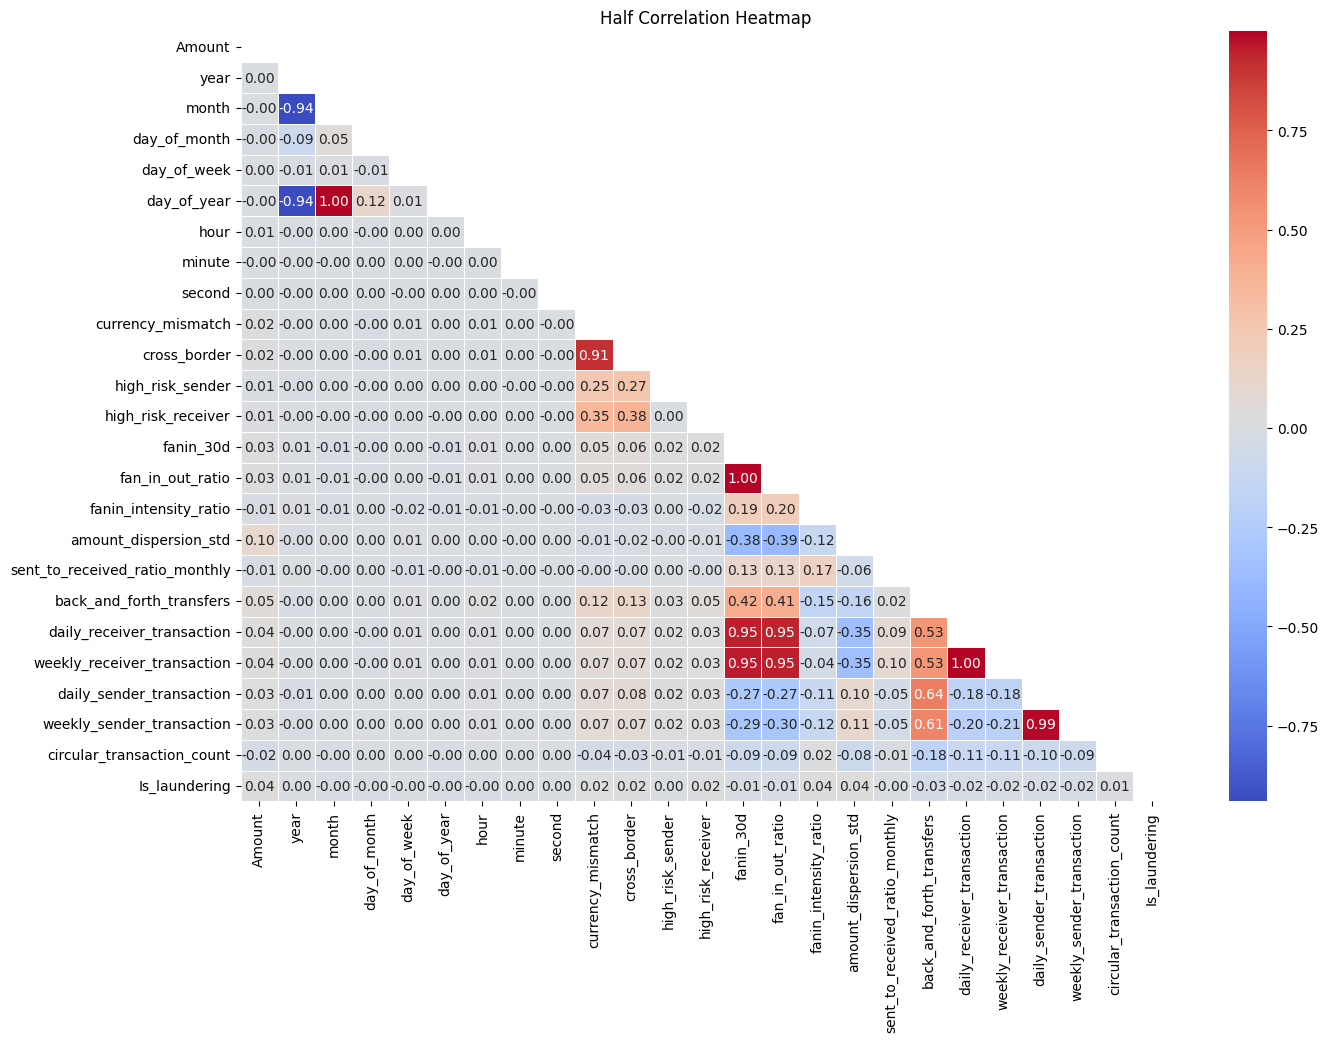

In [38]:
import numpy as np

mask = np.zeros_like(corr_df, dtype=bool) # Use bool for the mask
mask[np.triu_indices_from(mask)] = True

# 4. Draw the heatmap with the mask
plt.figure(figsize=(15, 10)) # Adjust figure size as needed
sns.heatmap(corr_df, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Half Correlation Heatmap')
plt.show()

**Circular transaction count histogram**

In [39]:
import math
import numpy as np

def plot_zero_nonzero_pies(
    df: pl.DataFrame,
    features: list,
    *,
    include_null_as_zero: bool = False,
    max_plots_per_fig: int = 9,
    figsize_per_plot: tuple = (4, 4),
    colors: tuple = ("#d62728", "#1f77b4"),
    autopct: str = "%1.1f%%",
    show_counts_on_legend: bool = True,
    title_prefix: str = ""
):
    def zero_nonzero_counts(col: str):
        s = df.select(pl.col(col))
        if include_null_as_zero:
            s = s.with_columns(pl.col(col).fill_null(0))
            total = s.height
            zeros = s.filter(pl.col(col) == 0).height
            nonzeros = total - zeros
        else:
            s = s.drop_nulls()
            total = s.height
            zeros = s.filter(pl.col(col) == 0).height
            nonzeros = total - zeros
        return int(zeros), int(nonzeros), int(total)

    if not features:
        return

    n_features = len(features)
    figs = math.ceil(n_features / max_plots_per_fig)
    for fig_idx in range(figs):
        start = fig_idx * max_plots_per_fig
        end = min(start + max_plots_per_fig, n_features)
        batch = features[start:end]
        n_batch = len(batch)

        ncols = int(math.ceil(math.sqrt(n_batch)))
        nrows = int(math.ceil(n_batch / ncols))
        fig, axes = plt.subplots(nrows, ncols,
                                 figsize=(figsize_per_plot[0] * ncols, figsize_per_plot[1] * nrows))
        # normalize axes to 1-D list for indexing
        if isinstance(axes, np.ndarray):
            axes = axes.flatten().tolist()
        elif not isinstance(axes, list):
            axes = [axes]

        for ax_i, col in enumerate(batch):
            ax = axes[ax_i]
            zeros, nonzeros, total = zero_nonzero_counts(col)
            values = [zeros, nonzeros]
            labels = ["zero", "non-zero"]

            wedges, texts, autotexts = ax.pie(
                values,
                labels=None,
                autopct=autopct,
                startangle=90,
                colors=colors
            )
            ax.set_aspect("equal")
            title = f"{title_prefix}{col} (n={total})" if title_prefix else f"{col} (n={total})"
            ax.set_title(title, fontsize=10)

            if show_counts_on_legend:
                legend_labels = [f"{labels[0]}: {zeros}", f"{labels[1]}: {nonzeros}"]
            else:
                legend_labels = labels
            ax.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=8)

        # hide any unused axes
        for j in range(n_batch, len(axes)):
            axes[j].axis("off")

        plt.tight_layout()
        plt.show()

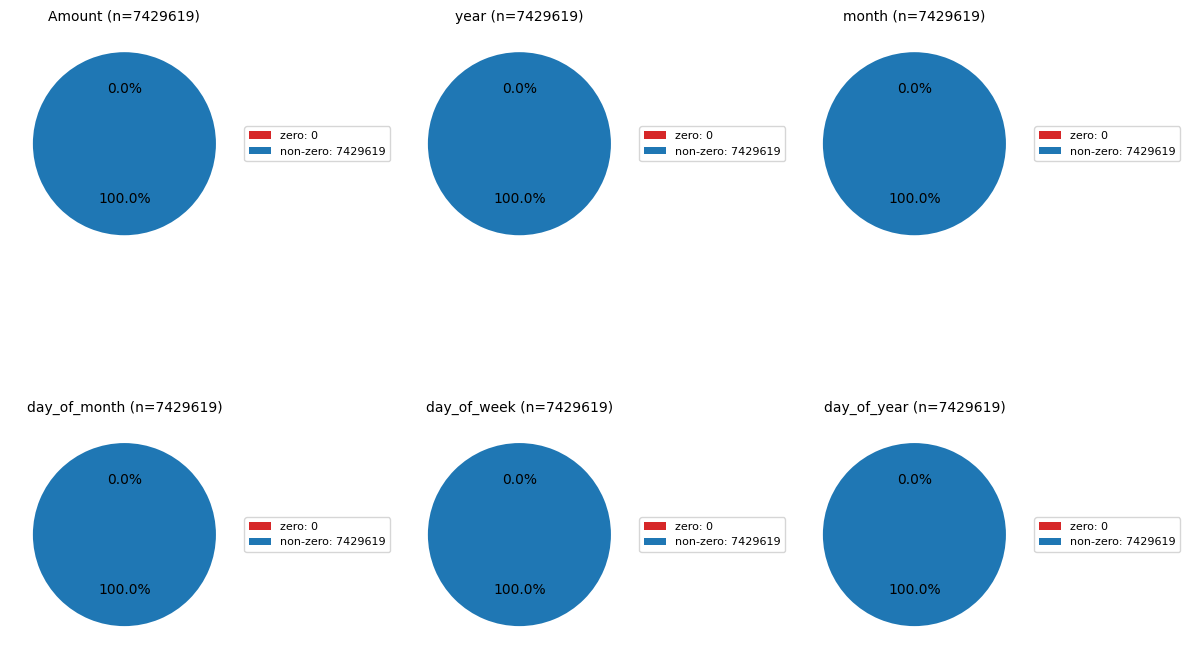

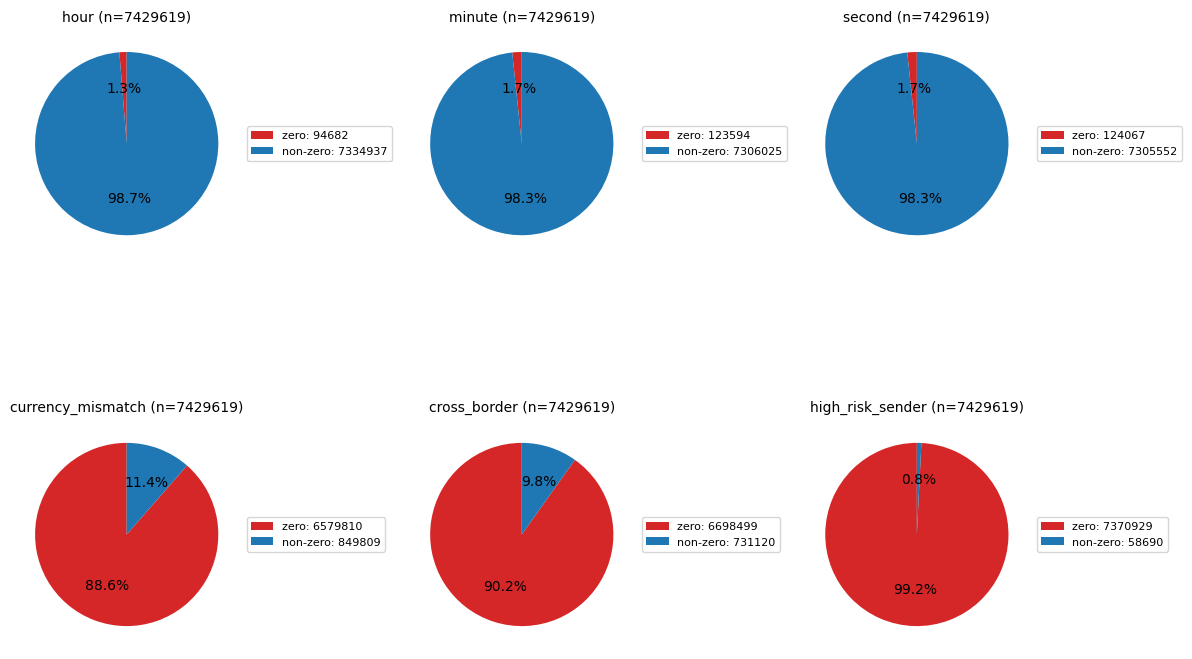

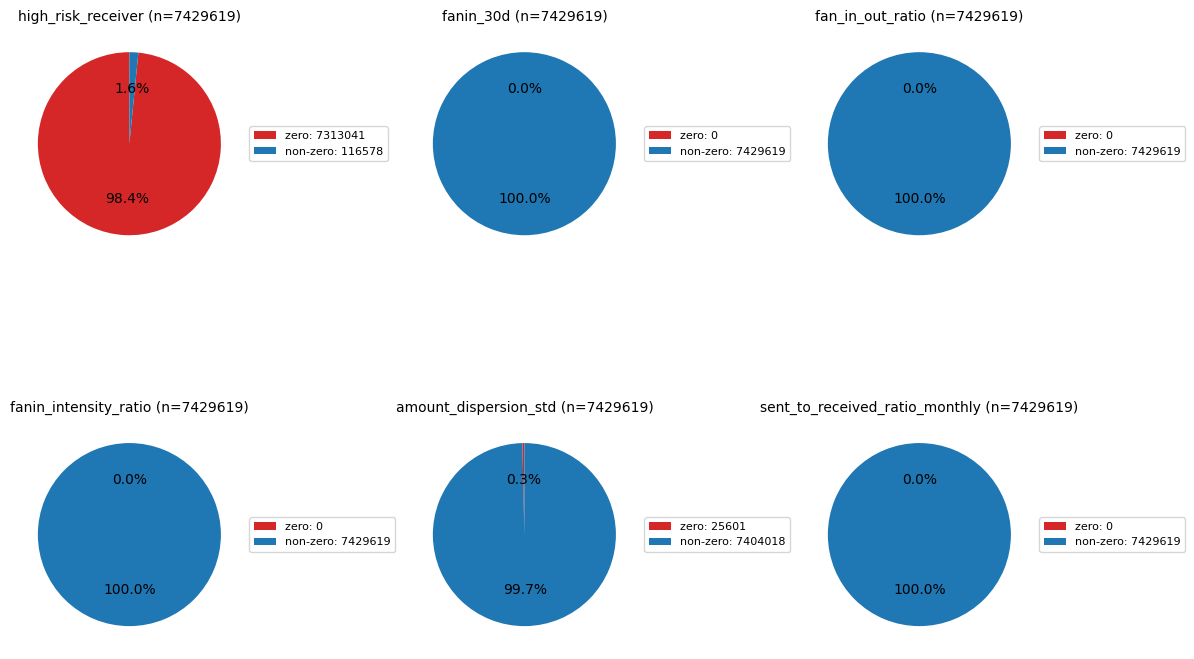

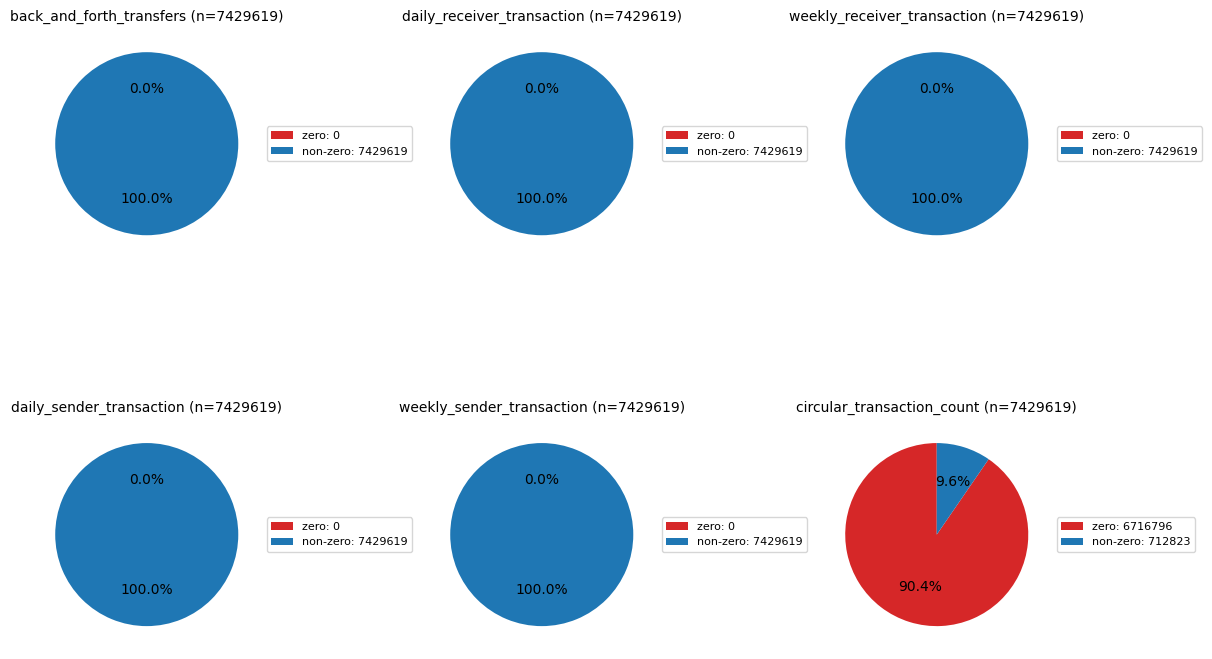

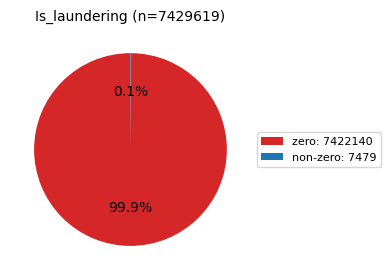

In [40]:
plot_zero_nonzero_pies(df_train, features, include_null_as_zero=False, max_plots_per_fig=6)

In [41]:
counts = (
    df_filtered
    .group_by("circular_transaction_count")   # use group_by not groupby
    .agg(pl.count().alias("n"))               # count rows per value
    .sort("n", descending=True)
)

cats = counts["circular_transaction_count"].to_list()
vals = counts["n"].to_list()

/tmp/ipython-input-1778457556.py:4: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("n"))               # count rows per value


In [42]:
vals

[496850,
 39140,
 35504,
 31705,
 26693,
 26213,
 12963,
 9320,
 9010,
 8657,
 8339,
 3761,
 2522,
 1546,
 457,
 143]

In [43]:
!pip install brokenaxes

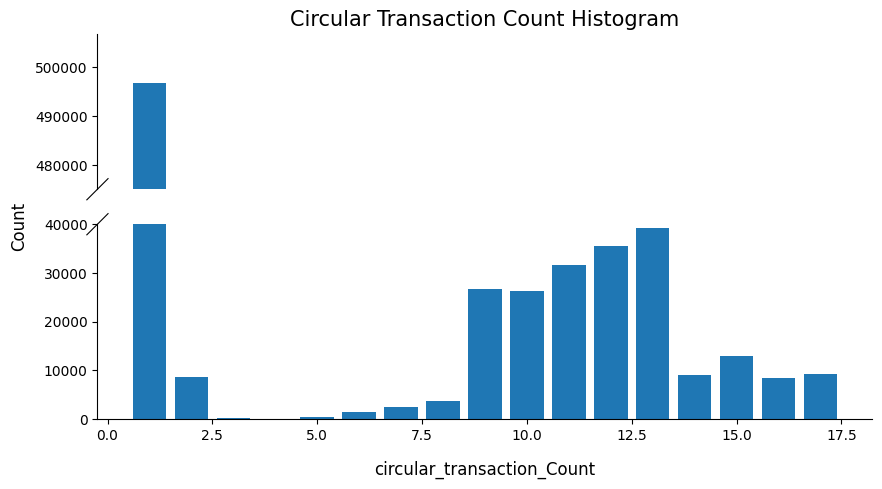

In [44]:
from brokenaxes import brokenaxes

fig = plt.figure(figsize=(10, 5))
bax = brokenaxes(
    ylims=((0, 40000), (475000, max(vals) + 10000))
)
bax.bar(cats, vals)
bax.set_xlabel("circular_transaction_Count", fontsize=12, labelpad=30)
bax.set_ylabel("Count", fontsize=12, labelpad=50)
bax.set_title("Circular Transaction Count Histogram", fontsize=15)
plt.show()

In [45]:
max(vals)

496850

**Fanin_30d**

In [46]:
counts_fanin = (
    df_train
    .group_by("fanin_30d")   # use group_by not groupby
    .agg(pl.count().alias("n"))               # count rows per value
    .sort("n", descending=True)
)

cats_fanin = counts_fanin["fanin_30d"].to_list()
vals_fanin = counts_fanin["n"].to_list()

/tmp/ipython-input-1086269798.py:4: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("n"))               # count rows per value


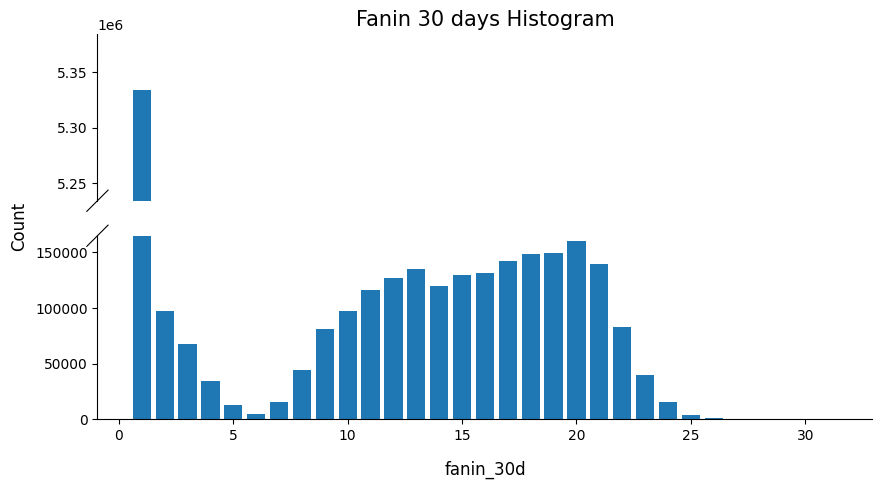

In [47]:
fig = plt.figure(figsize=(10, 5))
bax = brokenaxes(
    ylims=((0, 165000), (max(vals_fanin) - 100000, max(vals_fanin) + 50000))
)
bax.bar(cats_fanin, vals_fanin)
bax.set_xlabel("fanin_30d", fontsize=12, labelpad=30)
bax.set_ylabel("Count", fontsize=12, labelpad=50)
bax.set_title("Fanin 30 days Histogram", fontsize=15)
plt.show()

**Back and forth transfers**

In [48]:
counts_baft = (
    df_train
    .group_by("back_and_forth_transfers")   # use group_by not groupby
    .agg(pl.count().alias("n"))               # count rows per value
    .sort("n", descending=True)
)

cats_baft = counts_baft["back_and_forth_transfers"].to_list()
vals_baft = counts_baft["n"].to_list()

/tmp/ipython-input-3540428516.py:4: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("n"))               # count rows per value


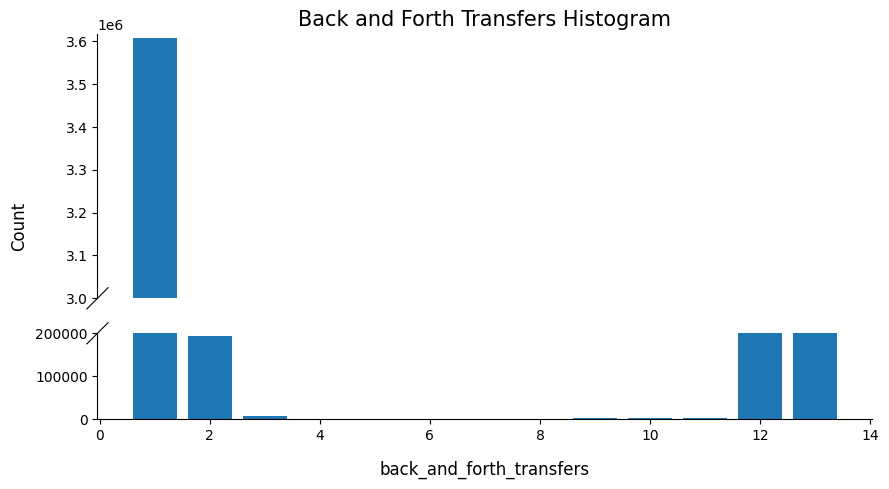

In [49]:
fig = plt.figure(figsize=(10, 5))
bax = brokenaxes(
    ylims=((0, 200000), (3000000, max(vals_baft) + 10000))
)
bax.bar(cats_baft, vals_baft)
bax.set_xlabel("back_and_forth_transfers", fontsize=12, labelpad=30)
bax.set_ylabel("Count", fontsize=12, labelpad=50)
bax.set_title("Back and Forth Transfers Histogram", fontsize=15)
plt.show()

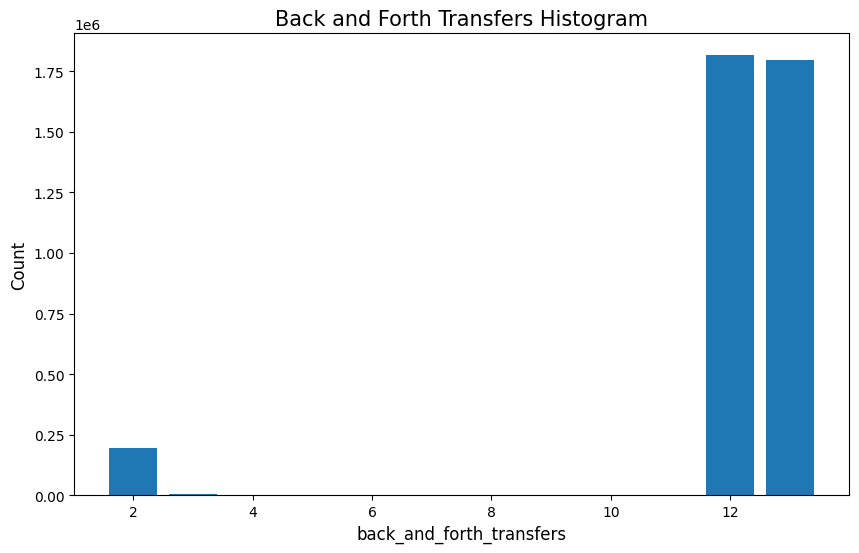

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(cats_baft[1:], vals_baft[1:])
plt.xlabel("back_and_forth_transfers", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Back and Forth Transfers Histogram", fontsize=15)
plt.show()